***Import data***

In [185]:

import pandas as pd

fert = pd.read_csv('data/gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('data/gapminder_lifeexpectancy.xlsx', index_col=0)
pop=pd.read_excel('data/gapminder_population.xlsx', index_col=0)
cont=pd.read_csv('data/continents.csv', sep=';',index_col=0)


***Data wrangling***

In [186]:
fert.columns = fert.columns.astype(int)
fert.index.name='country'
fert=fert.reset_index()
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')

In [187]:
life.index.name='country'
life=life.reset_index()
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')


In [188]:
pop.index.name='country'
pop=pop.reset_index()
pop=pop.melt(id_vars='country', var_name='year', value_name='population')

In [189]:
cont=cont.reset_index()

***Merge data***

In [190]:
df=fert.merge(pop)
df=df.merge(life)
df=df.merge(cont)
df=df.dropna()
df.head()

,country,year,fertility_rate,population,life_expectancy,continent
0,Afghanistan,1800,7.0,3280000.0,28.21,Asia
1,Afghanistan,1810,7.0,3280000.0,28.11,Asia
2,Afghanistan,1820,7.0,3323519.0,28.01,Asia
3,Afghanistan,1830,7.0,3448982.0,27.90,Asia
4,Afghanistan,1840,7.0,3625022.0,27.80,Asia


***Plot a single year***

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 10
sns.set_theme(style='white')

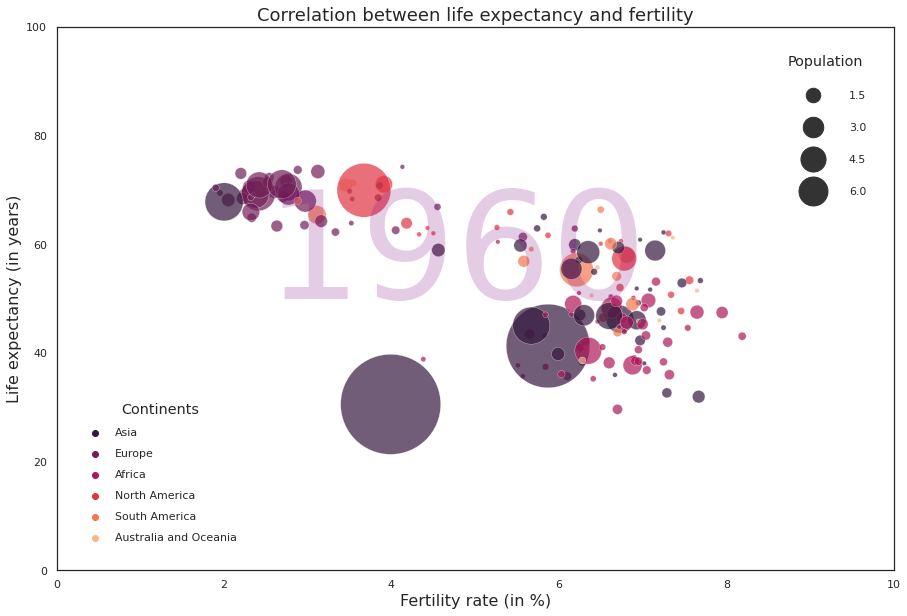

In [194]:
year=1960
df_year = df.loc[df['year']==year]

axes=sns.scatterplot(x = df_year['fertility_rate'], 
    y = df_year['life_expectancy'], hue='continent',
                        data=df_year, size=df_year['population'], sizes=(20,10000), alpha=0.7, 
                legend = True, palette='rocket')
plt.axis((0, 10.0, 0.0, 100.0))
plt.text(2.5, 50, year, fontsize=150, color='purple', alpha=0.2)

handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)
#Add the legend manually to the current Axes.
l=axes.legend(handles[1:7],labels[1:7], loc="lower left", labelspacing=1,borderpad=2, title="Continents", title_fontsize="large",
                     framealpha=0)
plt.gca().add_artist(l)
# Create another legend 
axes.legend(handles[-4:],labels[-4:], loc="upper right", labelspacing=2, borderpad=2, handlelength=5,
               title="Population", title_fontsize="large", framealpha=0, markerscale=0.3)


plt.xlabel('Fertility rate (in %)', fontsize = 16)
plt.ylabel('Life expectancy (in years)',fontsize = 16)
plt.title('Correlation between life expectancy and fertility',fontsize = 18)
   
plt.savefig(str(year)+'.png')

***Plot an animation***

In [193]:
for year in range(1960,2016):
    df_year = df.loc[df['year']==year]

    axes=sns.scatterplot(x = 'fertility_rate', 
    y = 'life_expectancy', hue='continent',
                        data=df_year, size='population', sizes=(20,10000), alpha=0.7, 
                legend = True, palette='rocket')
    plt.axis((0, 10.0, 0.0, 100.0))
    plt.text(2.5, 50, year, fontsize=150, color='purple', alpha=0.2)

    handles, labels = axes.get_legend_handles_labels()
    axes.legend(handles, labels)
    #Add the legend manually to the current Axes.
    l=axes.legend(handles[1:7],labels[1:7], loc="lower left", labelspacing=1,borderpad=2, title="Continents", title_fontsize="large",
                     framealpha=0)
    plt.gca().add_artist(l)
    # Create another legend 
    axes.legend(handles[-4:],labels[-4:], loc="upper right", labelspacing=2, borderpad=2, handlelength=5,
               title="Population", title_fontsize="large", framealpha=0, markerscale=0.3)


    plt.xlabel('Fertility rate (in %)', fontsize = 16)
    plt.ylabel('Life expectancy (in years)',fontsize = 16)
    plt.title('Correlation between life expectancy and fertility',fontsize = 18)
   
    plt.savefig('graphs/'+str(year)+'.png')
    plt.close() 
    
   
   

In [182]:
import imageio

In [183]:
images = []

for i in range(1960,2016):
    filename = 'graphs/{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=3)